In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)

In [154]:
def get_df_click_and_results(cluster):
    lista_dir = [x[0] for x in os.walk(os.getcwd()) if len(x[0].split("/")[-1]) == 13
                and x[0].split("/")[-2] == cluster]
    
    def get_results(lista_dir, flag_click=True):
        df = pd.DataFrame()
        for i in lista_dir:
            try:
                if flag_click:
                    file = glob.glob(i+'/*_click.csv')[0]
                else:
                    file = glob.glob(i+'/*_mani.csv')[0]
                df_temp = pd.read_csv(file)
                df = pd.concat([df, df_temp], axis=0)
#                 print(file)
            except IndexError:
#                 print('====no tiene resultados======')
#                 print(i)
                continue

        df.drop('Unnamed: 0',1,inplace=True)
        df.reset_index(drop=True,inplace=True)
        return df
    
    df_click = get_results(lista_dir, flag_click=True)
    df_click['proteinaA_proteinaB'] = df_click.proteinaA_proteinaB.str.replace('-','_')
    
    df_mani = get_results(lista_dir, flag_click=False)
    df_mani['SO'] = df_mani.SO * 100
    
    df_result = df_mani.merge(df_click,on='proteinaA_proteinaB',suffixes=["_mani","_click"])
    df_result['cluster'] = cluster
    
    return df_result

In [155]:
df = get_df_click_and_results('cluster_95')

In [156]:
df.sort_values('SO_mani')[['proteinaA_proteinaB', 'SO_mani', 'SO_click']]

,proteinaA_proteinaB,SO_mani,SO_click
24,5FHX_H_5HCG_H,62.35,70.78
22,6BR8_A_6BR8_B,81.22,100.00
12,3PHQ_B_3PHO_B,97.58,99.53
8,2IJ9_A_2IJ9_B,97.66,98.13
16,1W7P_A_1U5T_A,98.12,98.12
6,5IR0_A_5IR0_B,99.00,99.00
3,4ETV_A_4ETV_B,99.23,99.23
13,3I57_A_3I57_B,99.46,97.83
1,4PUC_A_4PUC_B,99.79,99.79
23,3H1Q_A_3H1Q_B,100.00,100.00


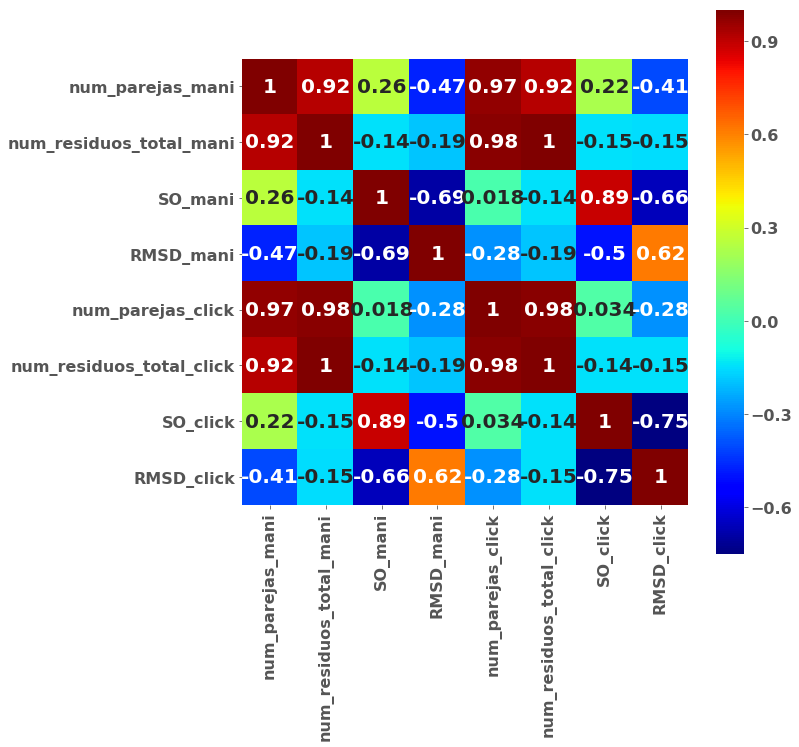

In [157]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), cmap='jet',annot=True,square=True)

3

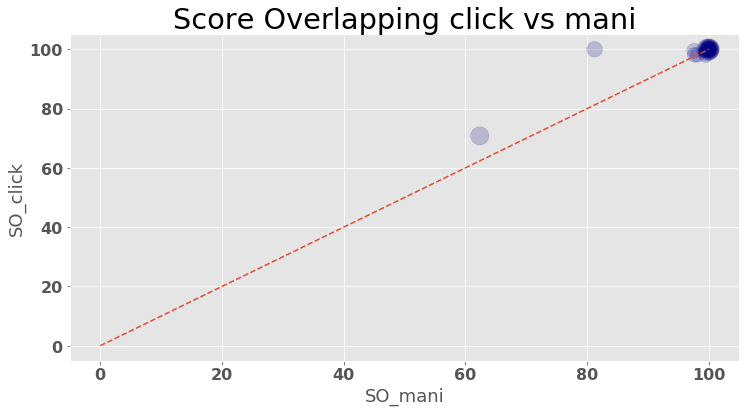

In [158]:
marker_size = df.num_residuos_total_click
# plt.figure(figsize=(20,10))
df.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score Overlapping click vs mani',s=marker_size,
              color='navy', figsize=(12,6))
plt.plot([0,100],[0,100],'--')
# plt.xlim(45,103)
3 # plt.ylim(45,103)

# concatenacion de resultados

In [162]:
df = get_df_click_and_results('cluster_30')

for i in ['cluster_50','cluster_70','cluster_95']:
    df_temp = get_df_click_and_results(i)
    df = pd.concat([df, df_temp])
    
df.reset_index(inplace=True, drop=True)
df['diff_SO'] = df.SO_click - df.SO_mani

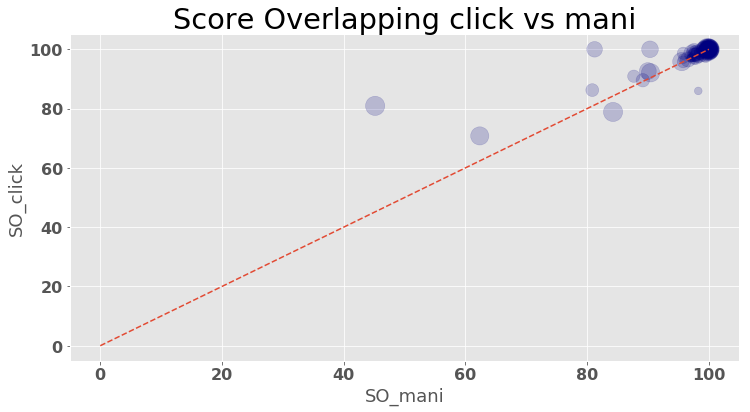

In [163]:
marker_size = df.num_residuos_total_click
# plt.figure(figsize=(20,10))
df.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score Overlapping click vs mani',s=marker_size,
              color='navy', figsize=(12,6))
plt.plot([0,100],[0,100],'--')

In [164]:
corr = df.corr().loc['SO_mani','SO_click']
rmse = np.sqrt(mean_squared_error(df.SO_click,df.SO_mani))

In [192]:
df['diff_SO'] = df['diff_SO'].astype(float).round(4)

In [193]:
df[df.diff_SO != 0].sort_values('diff_SO', ascending=False)[['proteinaA_proteinaB','cluster','SO_mani','SO_click', 'diff_SO']]

,proteinaA_proteinaB,cluster,SO_mani,SO_click,diff_SO
47,4BWP_A_4BWP_B,cluster_70,45.16,80.91,35.75
92,6BR8_A_6BR8_B,cluster_95,81.22,100.00,18.78
3,5VG9_A_5V7P_A,cluster_30,90.32,100.00,9.68
94,5FHX_H_5HCG_H,cluster_95,62.35,70.78,8.43
66,2ZMF_A_2ZMF_B,cluster_70,80.84,86.23,5.39
0,3SHP_A_3SHP_B,cluster_30,87.66,90.91,3.25
45,3OI8_A_3OI8_B,cluster_70,95.80,98.67,2.87
15,2XXZ_A_2XXZ_B,cluster_30,89.96,92.66,2.70
82,3PHQ_B_3PHO_B,cluster_95,97.58,99.53,1.95
61,3EUC_A_3EUC_B,cluster_70,90.42,92.08,1.66
